# 히든 마코프 모형

## 독립 혼합 모형(Independent Mixuture Model)

독립 혼합 모형(Independent Mixuture Model)은 연속 확률 변수이지만 단일한 확률 분포를 가지지 않고 복수의 연속 확률 분포 중 하나를 확률적으로 선택하는 모형을 말한다. 이 때 연속 확률 분포의 선택은 독립적인 이산 확률분포를 사용한다.

$$
\begin{eqnarray*}
p(x) 
&=& \sum_{i=1}^m {P}(C=i)\cdot {P}(X=x|C=i) \\
&=& \sum_{i=1}^m \delta_i p_i(x)
\end{eqnarray*}
$$

* $p(x)$ : 전체 Independent Mixuture 분포
* $p_i(x)$ : Independent Mixuture의 각 성분(component)이 되는 개별적인 연속 확률분포
* $\delta_i$ : mixing parameter. 특정시간에 대해 모든 성분 중 특정한 $p_i(x)$가 선택될 확률. 이산 확률 분포
* $\sum\delta_i = 1$ : mixing parameter에 대한 확률 제한 조건

### 독립 혼합 모형의 예:  베르누이-정규 혼합 모형

베르누이-정규 혼합 모형(Bernoulli Normal-Mixuture Model)은 베르누이 확률 변수의 값에 따라 두 개의 서로 다른 연속 정규 분포 중 하나를 선택하는 확률 분포이다.

<img src="https://datascienceschool.net/upfiles/16f53a04ffdf42febe4a175c1138b701.png" style="width: 80%">

## 마코프 체인(Markov Chain)

마코프 체인은 다음과 같은 마코프(Markov) 특성을 가지는 이산시간 확률 프로세스를 말한다.

$$
P(C_{t+1} \mid C_t, \cdots, C_1) = P(C_{t+1} \mid C_t)
$$

이 때 특정 시간 $t$ 동안 특정한 한 상태 $i$ 에서 특정한 다른 상태 $j$ 로 전이할 확률을 ** 전이 확률(Transition Probability)** 이라고 한다.

$$
\gamma_{ij}(t) = P(C_{s+t}=j|C_{s}=i) 
$$


또한 모든 상태 조합에 대한 전이 확률을 나타낸 것이 전이 확률 행렬(Transition Probability Matirx)이다.

$$
\Gamma(t) = \{ \gamma_{ij}(t) \}, \;\;\; \Gamma = \Gamma(1)
$$


체프먼-콜모고로프 방정식(Chapman-Kolmogorov Equation에 의하면 시간 $t+u$ 의 전이확률행렬은 시간 $t$ 의 전이확률행렬과 시간 $u$ 의 전이확률행렬의 곱으로 나타난다.

$$
 \Gamma(t+u) = \Gamma(t)\Gamma(u)
$$

## 히든 마코프 모형(Hidden Markov Model)

히든 마코프 모형(Hidden Markov Model)은 독립 혼합 모형에서 연속 확률 분포를 선택하는 이산 확률 과정 $C_t$가 마코프 체인이고 연속 확률 분포$X_t$ 가 그 시점의 이산 확률 과정의 값에만 의존하는 모형을 말한다. 그러나 연속 확률 분포의 값 $X_t$  만 측정 가능하고 이산 확률 과정의 값 $C_t$ 는 측정할 수 없다.

$$
P(C_t \mid |C_{t-1}, \cdots, C_1) = P(C_t \mid C_{t-1})
$$

$$
P(X_t \mid X_t, \cdots, X_1, C_t, \cdots, C_1) = P(X_t \mid C_t)
$$

<img src="https://datascienceschool.net/upfiles/b22b1d17b66e4e489c1c87ecac855a14.png" style="width: 80%">

## hmmlearn 패키지

Python에는 다양한 HMM 시뮬레이션 및 추정용 패키지가 제공된다. 여기에서는 그 중 하나인 hmmlearn 패키지를 사용해보자.

hmmlearn의 hmm 서브 패키지에서는 다음과 같은 세가지 HMM 모형 클래스를 제공한다.

* `GaussianHMM`	
 * Hidden Markov Model with Gaussian emissions.
* `GMMHMM`	
 * Hidden Markov Model with Gaussian mixture emissions.
* `MultinomialHMM`	
 * Hidden Markov Model with multinomial (discrete) emissions

`GaussianHMM` 클래스를 사용하면 카테고리-다변수 정규분포 혼합 모형을 시뮬레이션 할 수 있다.

이 때 다음과 같은 속성을 설정할 수 있다.

* `startprob_`: 초기 확률 벡터
* `transmat_`: 전이 확률 행렬
* `means_`: 정규 분포의 기댓값 벡터
* `covars_`: 정규 분포의 공분산 행렬

가장 간단한 베르누이-정규 분포를 시험해보자. 

In [1]:
from hmmlearn import hmm
np.random.seed(3)

model = hmm.GaussianHMM(n_components=2, covariance_type="diag")
model.startprob_ = np.array([0.9, 0.1])
model.transmat_ = np.array([[0.95, 0.05], [0.15, 0.85]])
model.means_ = np.array([[1.0], [-3.0]])
model.covars_ = np.array([[15.0], [40.0]])
X, Z = model.sample(500)

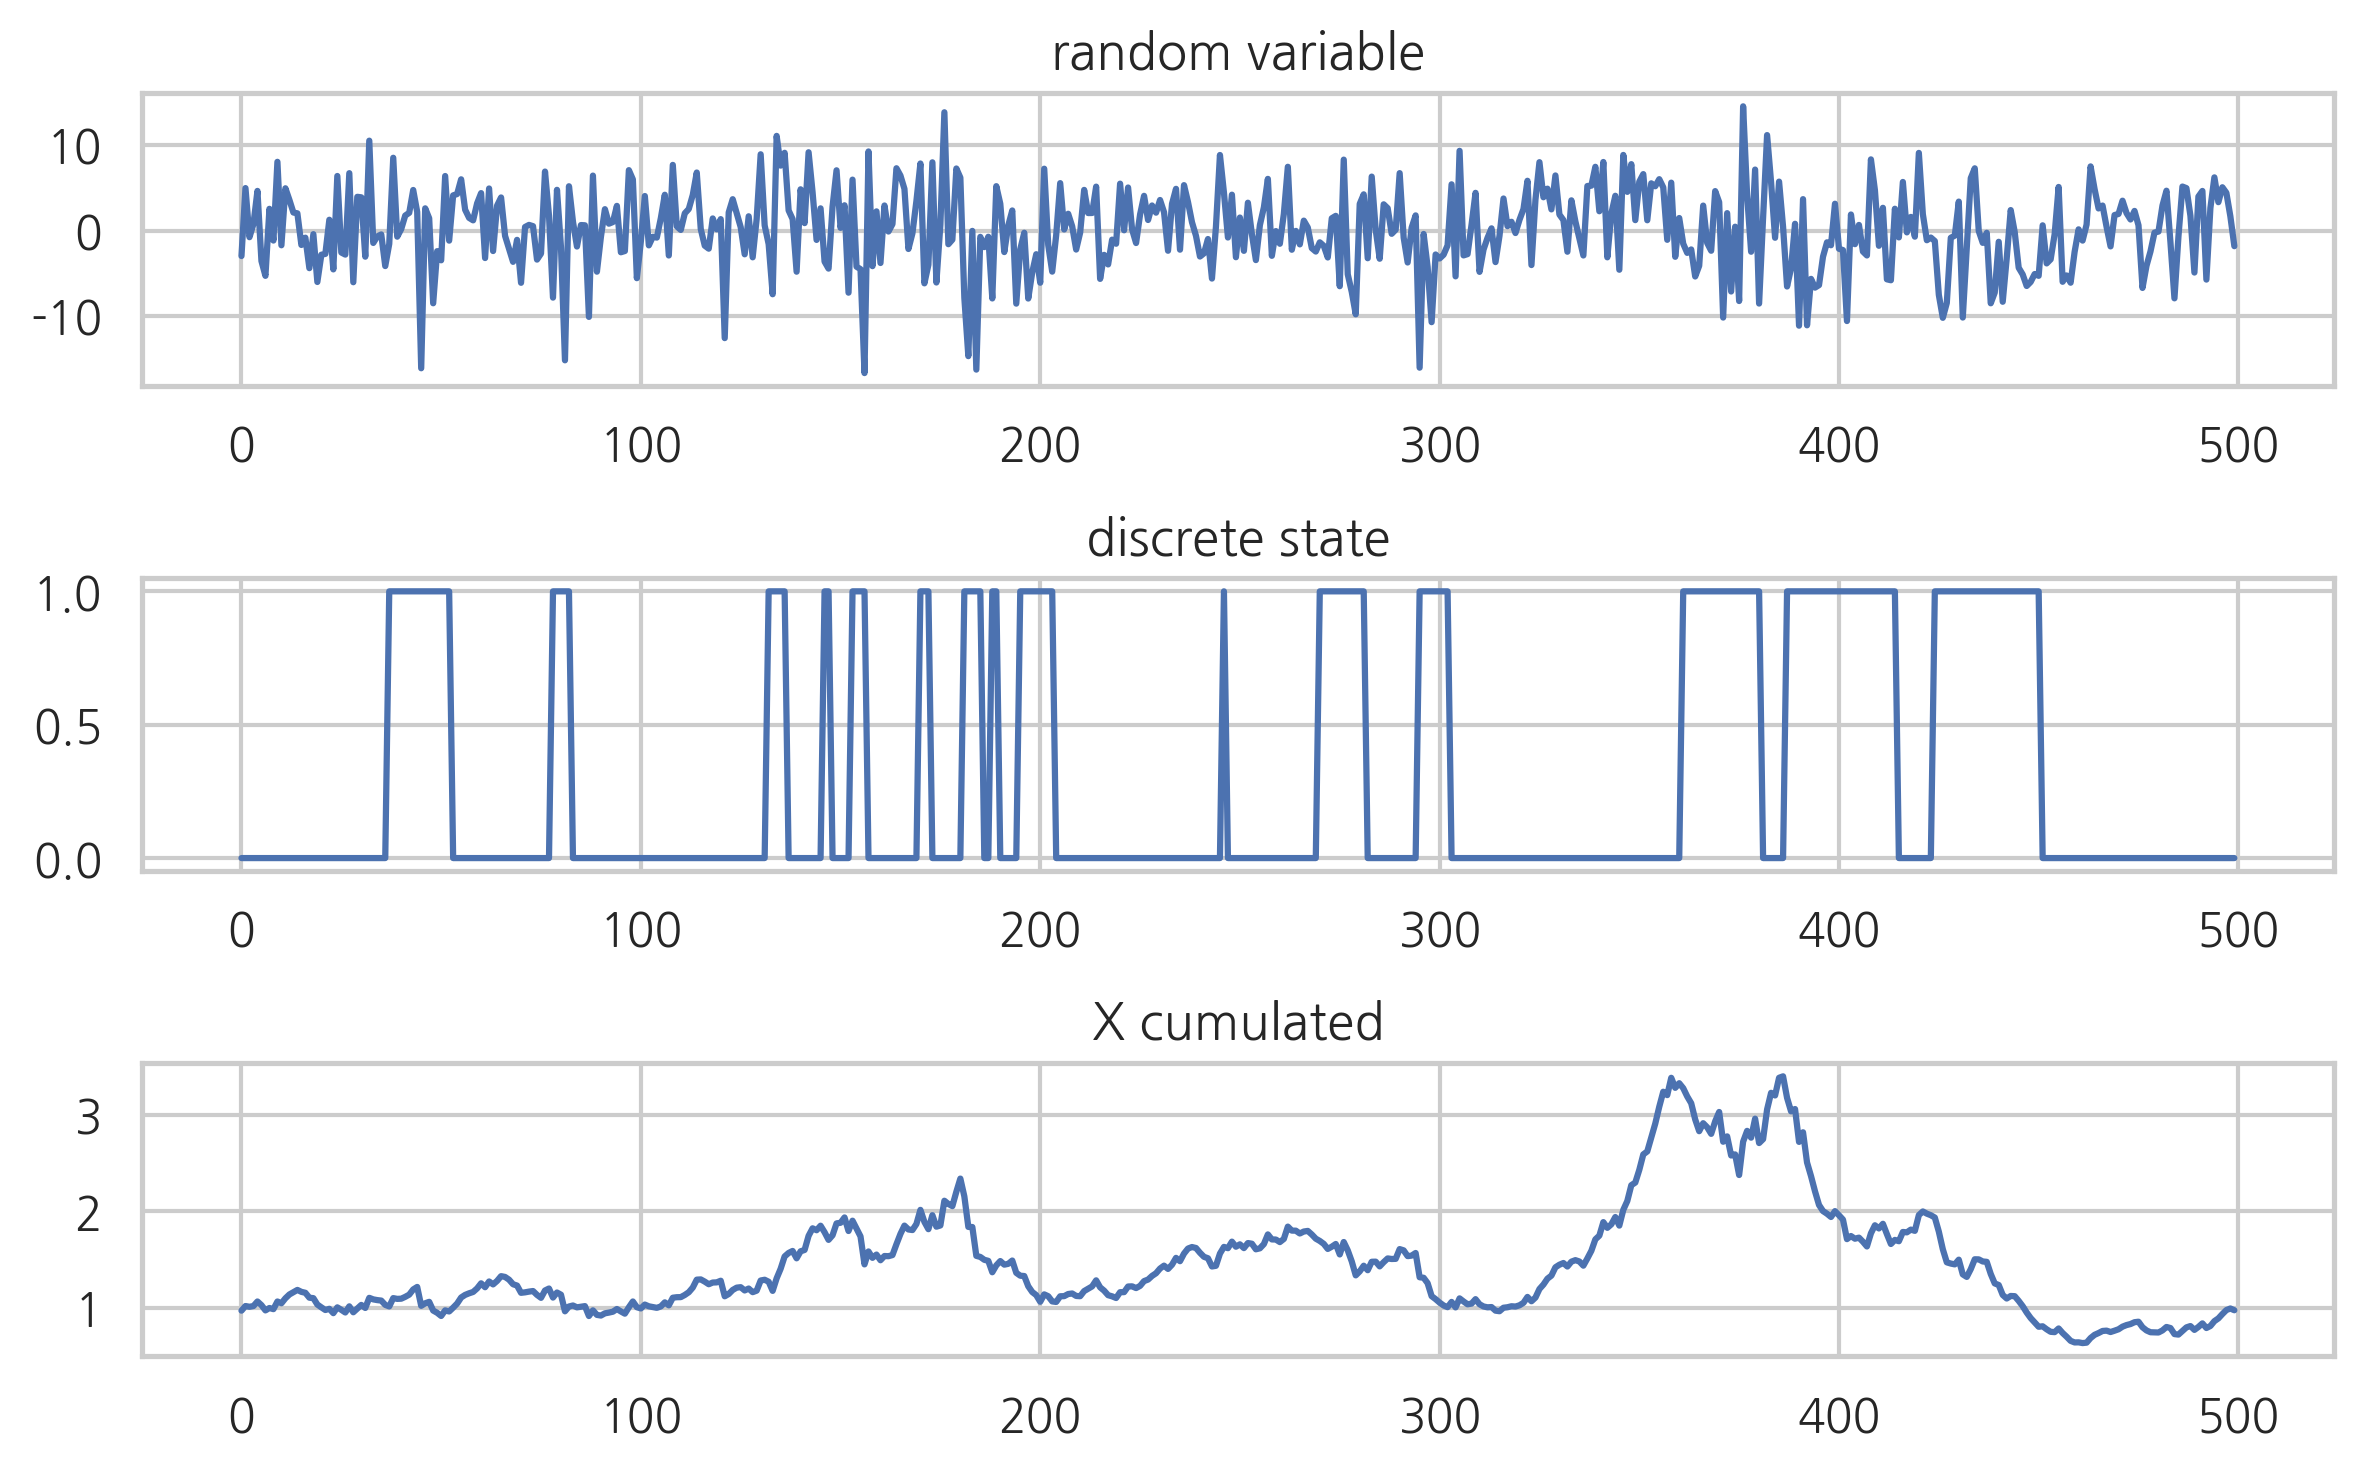

In [2]:
plt.subplot(311)
plt.plot(X)
plt.title("random variable")
plt.subplot(312)
plt.plot(Z)
plt.title("discrete state")
plt.subplot(313)
plt.plot((1 + 0.01*X).cumprod())
plt.title("X cumulated")
plt.tight_layout()
plt.show()

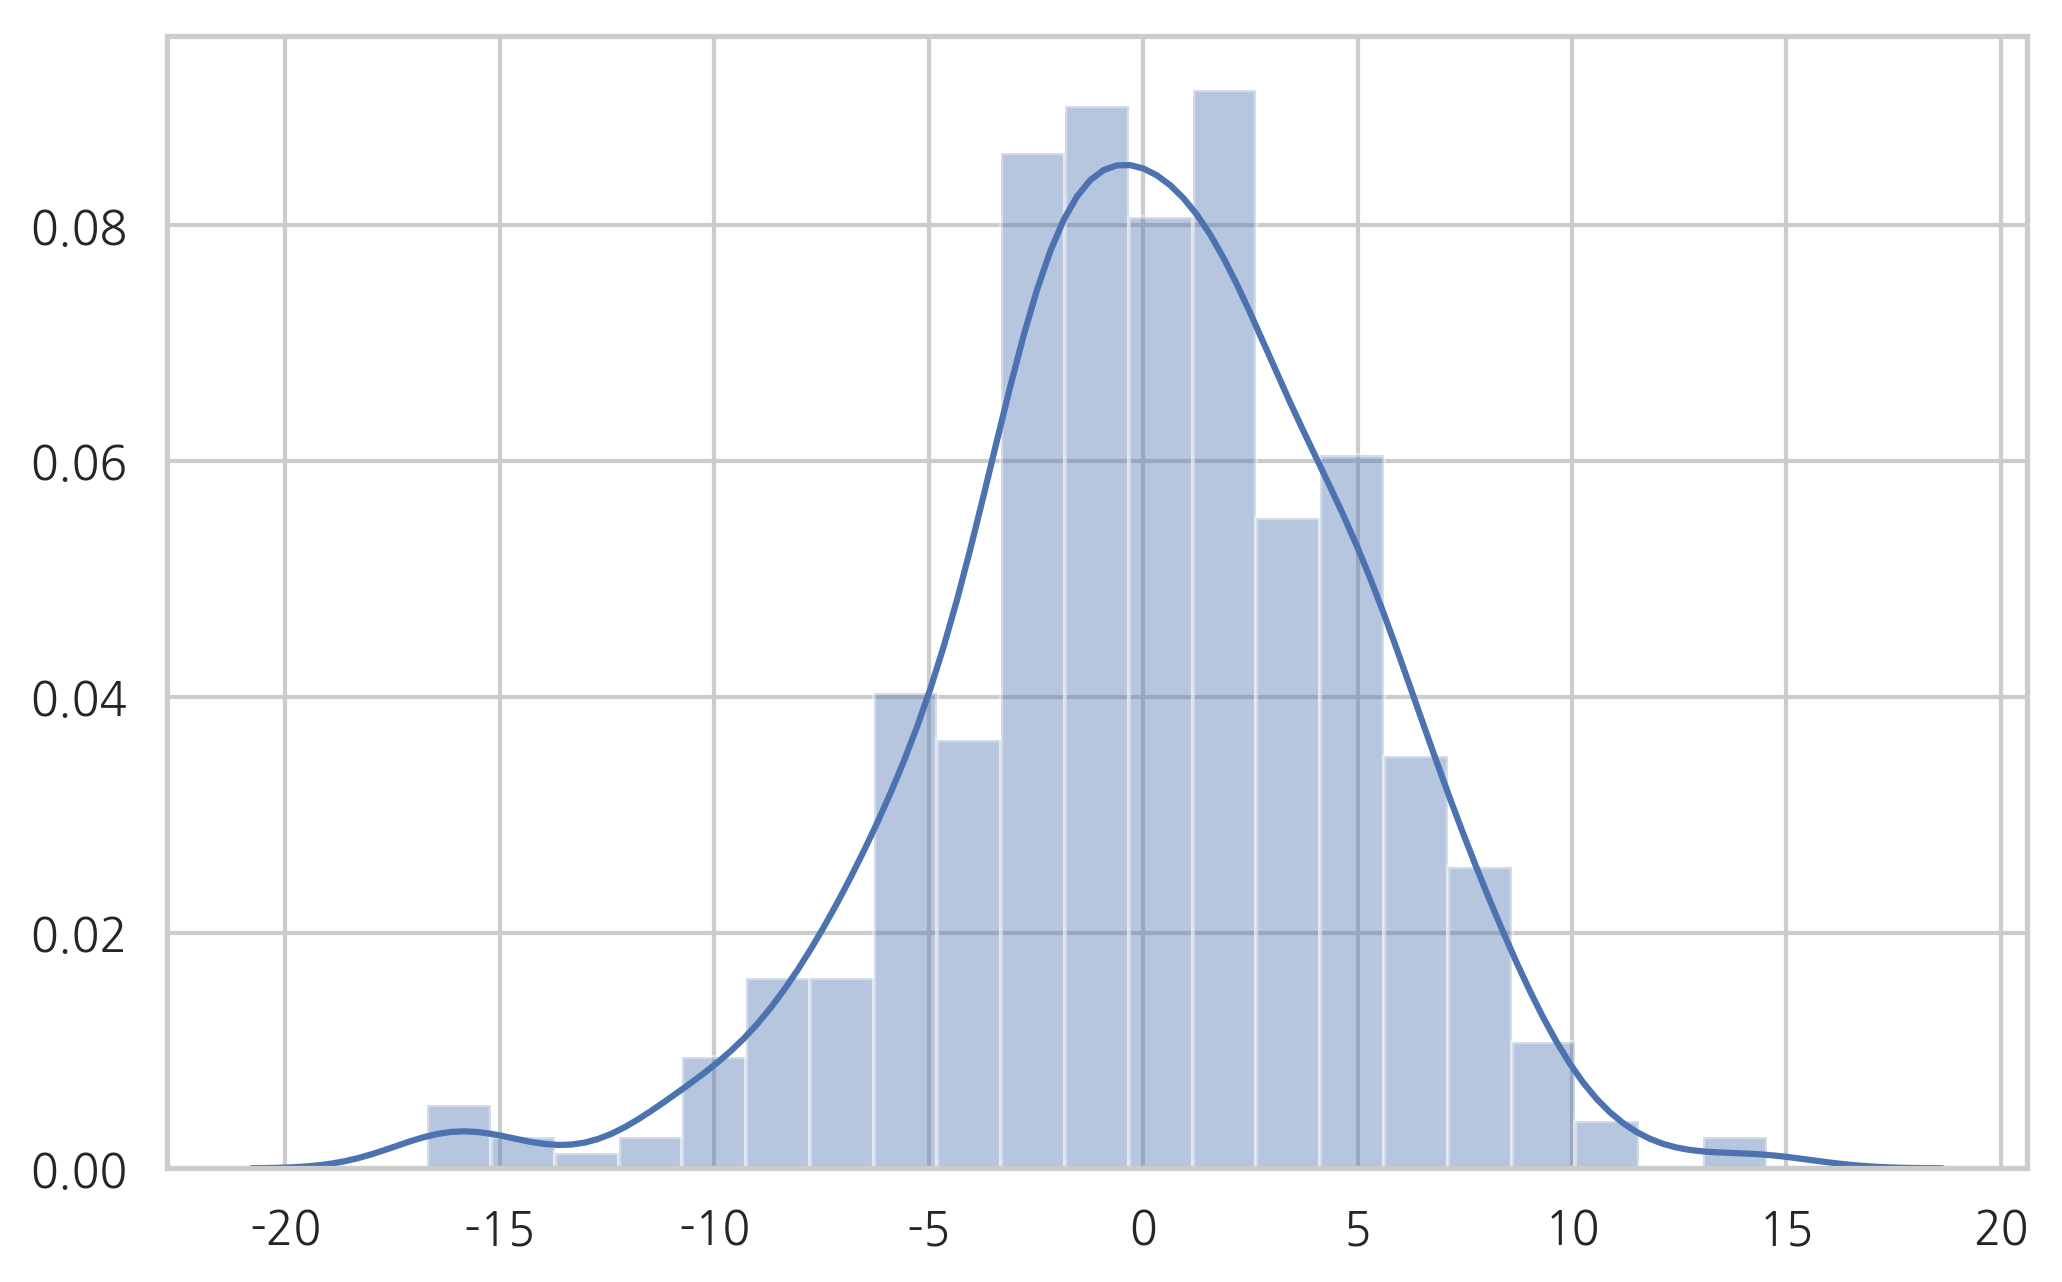

In [3]:
sns.distplot(X)
plt.show()

## 디코드

관측된 히든 마코프 모형의 연속 확률 변수 값으로부터 내부의 이산 확률 변수 값을 추정하는 과정을 디코드(decode)라고 한다. 디코드 알고리즘 중 가장 많이 사용되는 것은 Viterbi 알고리즘이다.

hmmlearn 패키지의 HMM 클래스들은 모형 추정을 위한 `fit` 메서드와 디코딩을 위한 `decode` 메서드를 제공한다. 다음은 위에서 시뮬레이션한 결과를 디코딩한 예이다.

In [4]:
model2 = hmm.GaussianHMM(n_components=2, n_iter=len(X)).fit(X)
model2

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=2, n_iter=500, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [5]:
Z_hat = model2.decode(X)[1]
X_cum = (1 + 0.01*X).cumprod()
X_cum_hat = X_cum.copy()
X_cum_hat[Z_hat == 0] = np.nan

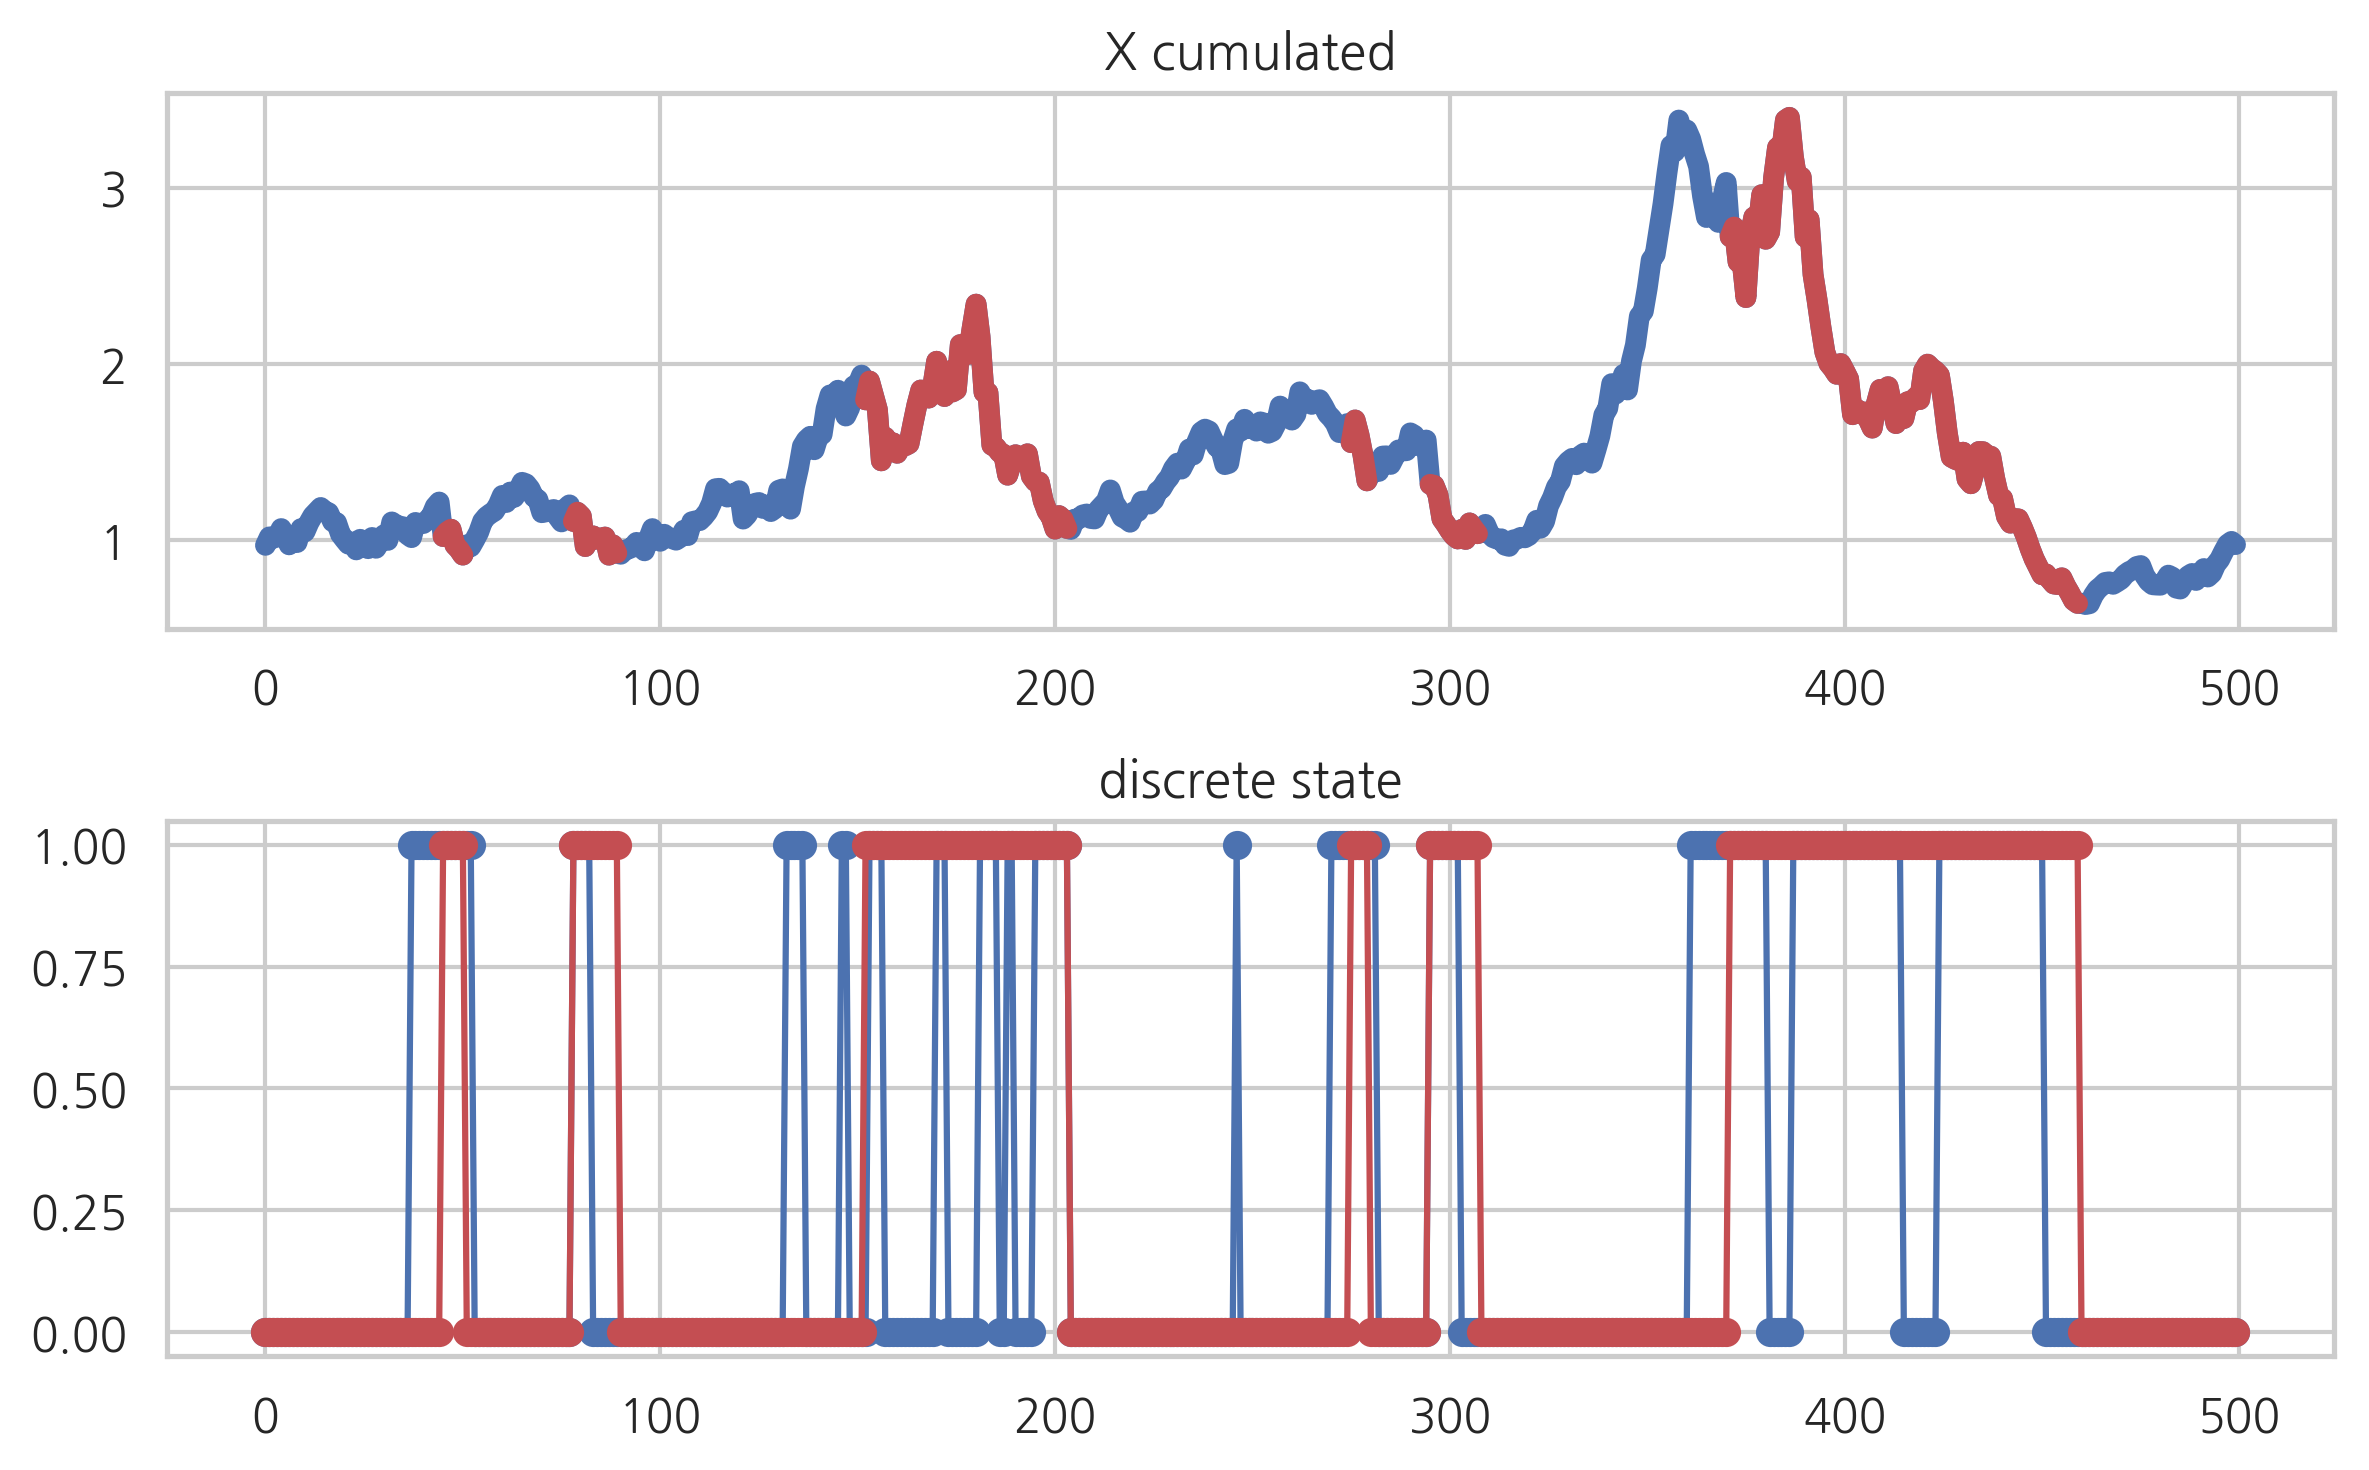

In [6]:
plt.subplot(211)
plt.plot(X_cum, lw=5)
plt.plot(X_cum_hat, 'r-', lw=5)
plt.title("X cumulated")
plt.subplot(212)
plt.plot(Z, 'bo-')
plt.plot(Z_hat, 'ro-')
plt.title("discrete state")
plt.tight_layout()
plt.show()